<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/klasifikasi_model_uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU
From (redirected): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU&confirm=t&uuid=5abab73d-48c6-4c21-afbd-7bf3bdeb0313
To: /content/KlasifikasiUTS.csv
100% 151M/151M [00:02<00:00, 66.9MB/s]


Pengumpulan Dan Pembersihan Data

In [ ]:
# Library utama untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Untuk preprocessing dan pembagian data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Seleksi fitur
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

# Evaluasi performa model
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

# Model-model machine learning yang digunakan
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Matikan peringatan agar output tetap bersih
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi tampilan DataFrame dan visualisasi
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
sns.set_theme(style="whitegrid")


1.Pengumpulan dan Pembersihan Data

Dataset berhasil dimuat! Ukuran data: (284807, 31)

>>> INFO DATASET
Baris dan kolom: (284807, 31)

>>> CONTOH DATA
   Time        V1        V2        V3        V4        V5        V6        V7        V8        V9       V10       V11  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843   

        V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22  \
0 -0.617801 -0.991390 -0.311169  1.468177 

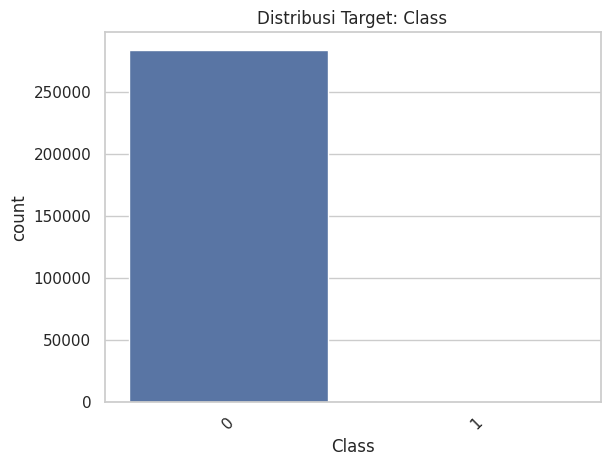

Target: Class
Fitur numerik: 30
Fitur kategorikal: 0

>>> TANGANI MISSING VALUES
Missing: 0 -> 0

>>> TANGANI OUTLIER
V1: 7062 outlier diatasi dengan capping
V2: 13526 outlier diatasi dengan capping
V3: 3363 outlier diatasi dengan capping
V4: 11148 outlier diatasi dengan capping
V5: 12295 outlier diatasi dengan capping
V6: 22965 outlier diatasi dengan capping
V7: 8948 outlier diatasi dengan capping
V8: 24134 outlier diatasi dengan capping
V9: 8283 outlier diatasi dengan capping
V10: 9496 outlier diatasi dengan capping
V11: 780 outlier diatasi dengan capping
V12: 15348 outlier diatasi dengan capping
V13: 3368 outlier diatasi dengan capping
V14: 14149 outlier diatasi dengan capping
V15: 2894 outlier diatasi dengan capping
V16: 8184 outlier diatasi dengan capping
V17: 7420 outlier diatasi dengan capping
V18: 7533 outlier diatasi dengan capping
V19: 10205 outlier diatasi dengan capping
V20: 27770 outlier diatasi dengan capping
V21: 14497 outlier diatasi dengan capping
V22: 1317 outlier dia

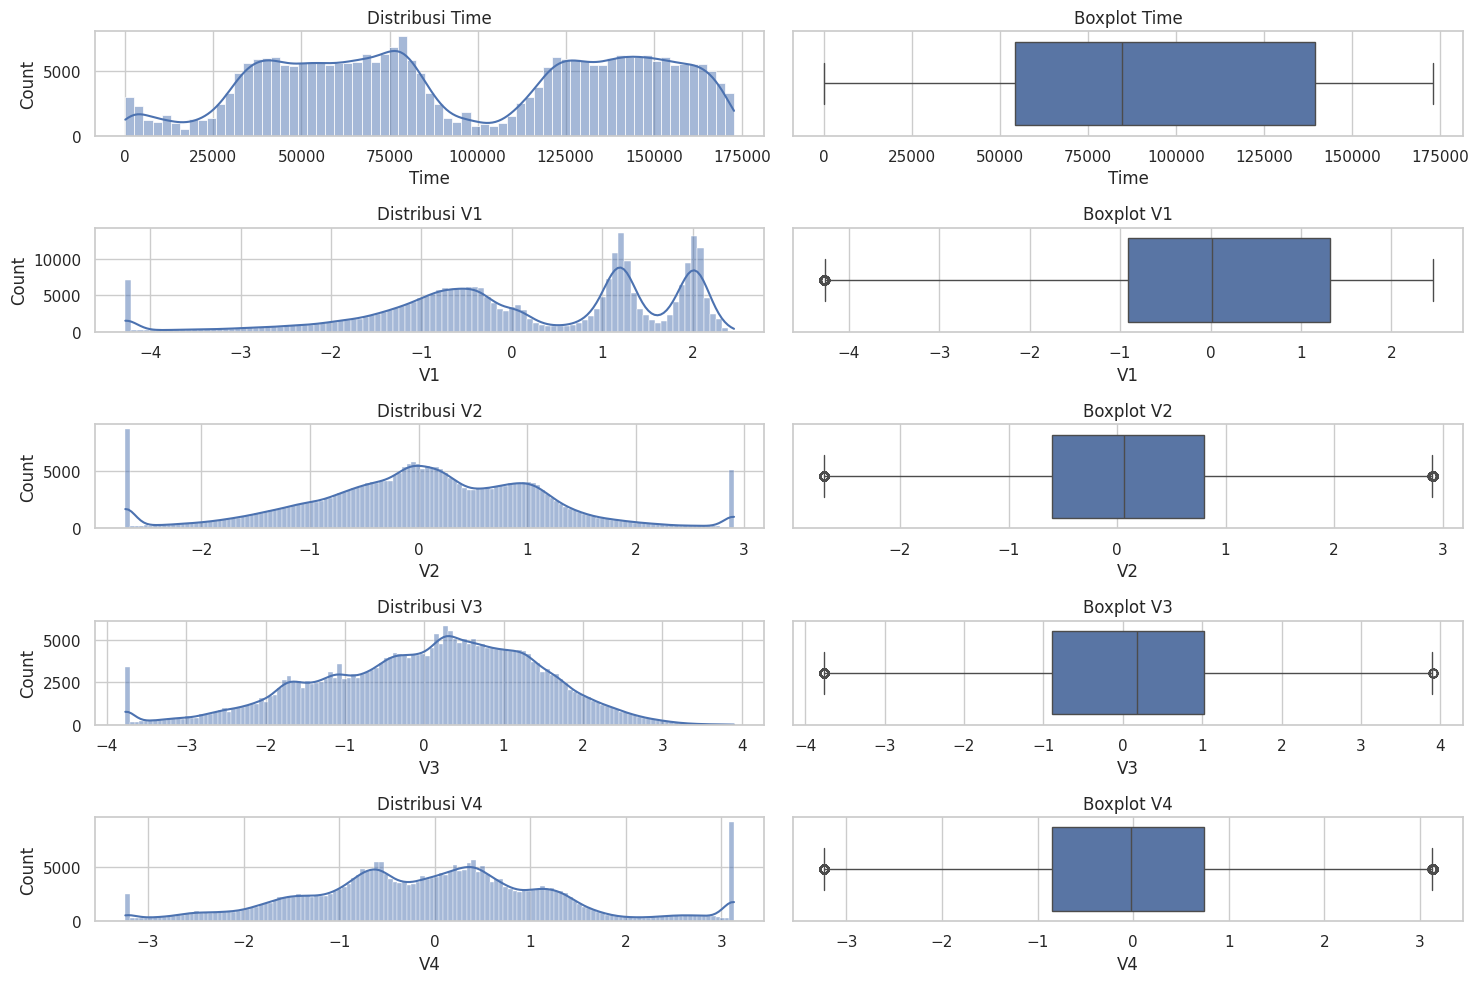

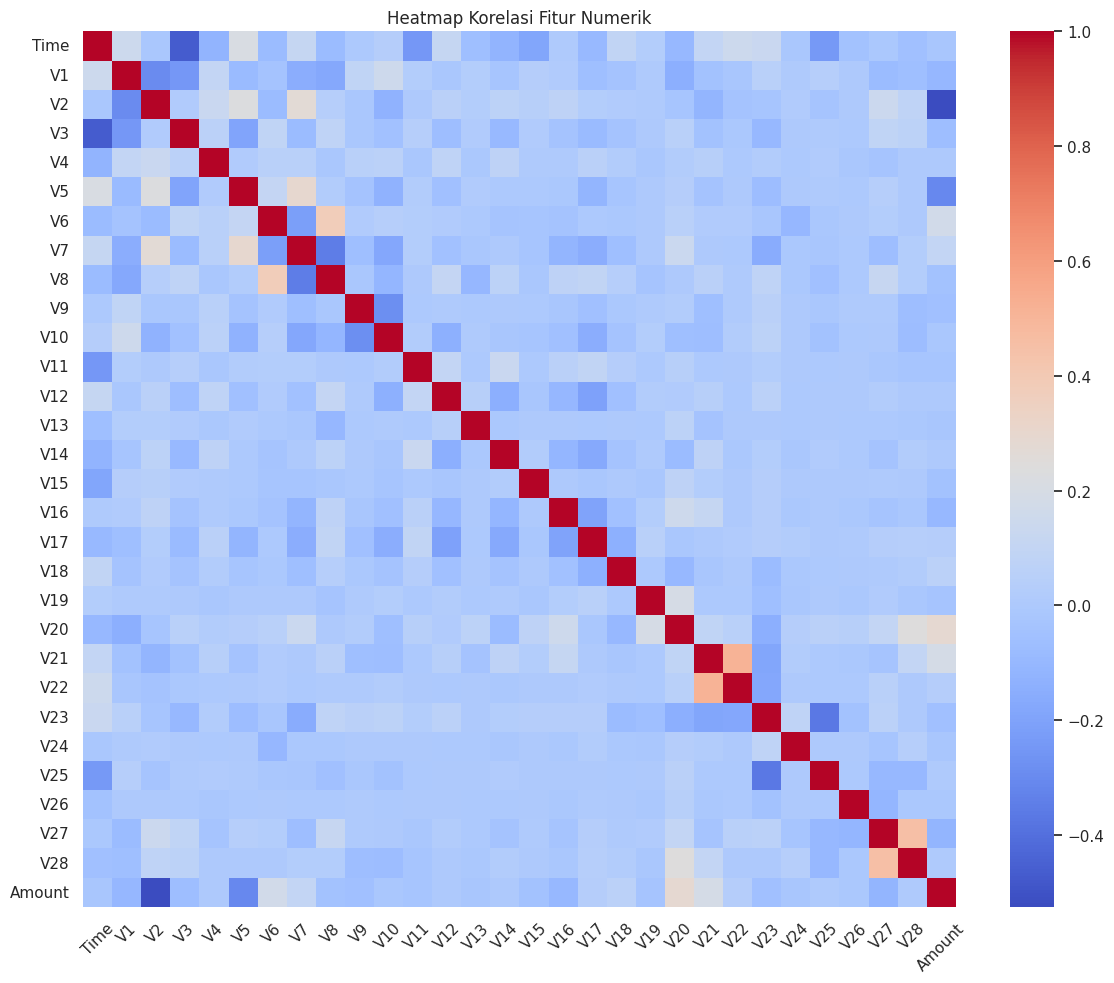

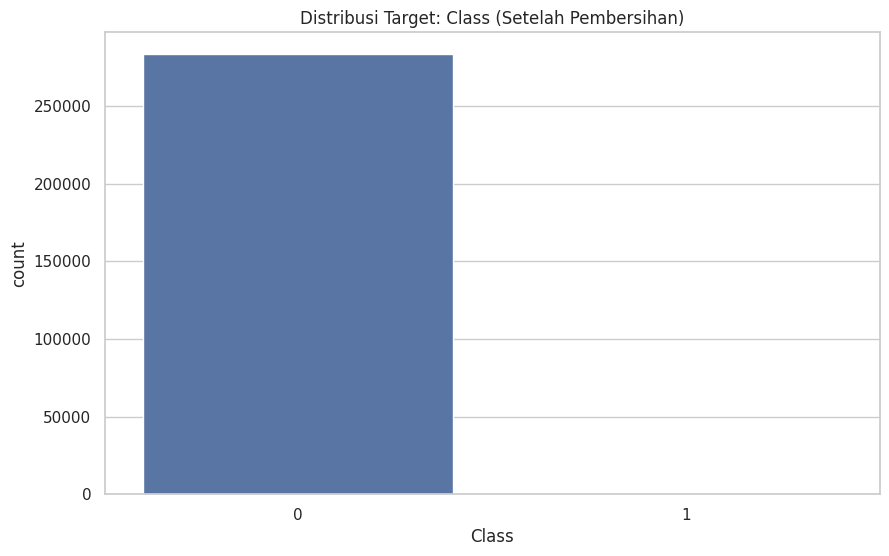

In [ ]:
# Import data dari file CSV
def baca_dataset(path_file):
    try:
        data = pd.read_csv(path_file)
        print(f"Dataset berhasil dimuat! Ukuran data: {data.shape}")
        return data
    except Exception as error:
        print(f"Gagal membaca data: {error}")
        return None

# Tentukan lokasi file
lokasi_file = 'KlasifikasiUTS.csv'  # Pastikan sesuai dengan nama file
df = baca_dataset(lokasi_file)

# Eksplorasi awal
def eksplorasi_data(data):
    print("\n>>> INFO DATASET")
    print(f"Baris dan kolom: {data.shape}")
    print("\n>>> CONTOH DATA")
    print(data.head())
    print("\n>>> STRUKTUR DATA")
    print(data.info())
    print("\n>>> STATISTIK DESKRIPTIF")
    print(data.describe())
    print("\n>>> NILAI KOSONG")
    print(data.isnull().sum())
    print("\n>>> DUPLIKAT")
    print(f"Jumlah baris duplikat: {data.duplicated().sum()}")

    # Deteksi kolom target
    kolom_target = 'target' if 'target' in data.columns else data.columns[-1]
    print(f"\n>>> DISTRIBUSI TARGET ({kolom_target})")
    if data[kolom_target].dtype == 'object' or data[kolom_target].nunique() < 10:
        print(data[kolom_target].value_counts(normalize=True) * 100)
        sns.countplot(x=kolom_target, data=data)
    else:
        sns.histplot(data[kolom_target], kde=True)
    plt.title(f'Distribusi Target: {kolom_target}')
    plt.xticks(rotation=45)
    plt.show()

# Jalankan eksplorasi
eksplorasi_data(df)

# Pembersihan data
def bersihkan_data(data, target=None):
    data_bersih = data.copy()
    target = target or ('target' if 'target' in data_bersih.columns else data_bersih.columns[-1])

    print(f"Target: {target}")
    X = data_bersih.drop(columns=[target])
    y = data_bersih[target]

    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    print(f"Fitur numerik: {len(num_cols)}")
    print(f"Fitur kategorikal: {len(cat_cols)}")

    print("\n>>> TANGANI MISSING VALUES")
    before = data_bersih.isnull().sum().sum()

    for col in num_cols:
        if data_bersih[col].isnull().any():
            med = data_bersih[col].median()
            data_bersih[col].fillna(med, inplace=True)
            print(f"Isi missing pada '{col}' dengan median: {med}")

    for col in cat_cols:
        if data_bersih[col].isnull().any():
            mode_val = data_bersih[col].mode()[0]
            data_bersih[col].fillna(mode_val, inplace=True)
            print(f"Isi missing pada '{col}' dengan mode: {mode_val}")

    print(f"Missing: {before} -> {data_bersih.isnull().sum().sum()}")

    print("\n>>> TANGANI OUTLIER")
    for col in num_cols:
        Q1 = data_bersih[col].quantile(0.25)
        Q3 = data_bersih[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_count = ((data_bersih[col] < lower) | (data_bersih[col] > upper)).sum()
        if outlier_count > 0:
            data_bersih[col] = data_bersih[col].clip(lower=lower, upper=upper)
            print(f"{col}: {outlier_count} outlier diatasi dengan capping")

    print("\n>>> TANGANI DUPLIKAT")
    dup = data_bersih.duplicated().sum()
    if dup:
        data_bersih = data_bersih.drop_duplicates()
        print(f"Dihapus: {dup} duplikat")

    print("\n>>> RINGKASAN AKHIR")
    print(f"Jumlah awal: {data.shape[0]} → Setelah bersih: {data_bersih.shape[0]}")
    return data_bersih, target

# Bersihkan data
df_clean, kolom_target = bersihkan_data(df)

# Visualisasi hasil pembersihan
def visualisasi_pasca_bersih(data, kolom_target):
    num_cols = data.select_dtypes(include='number').columns.tolist()
    if kolom_target in num_cols:
        num_cols.remove(kolom_target)
    pilih = num_cols[:5]

    if pilih:
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(pilih):
            plt.subplot(len(pilih), 2, 2 * i + 1)
            sns.histplot(data[col], kde=True)
            plt.title(f'Distribusi {col}')

            plt.subplot(len(pilih), 2, 2 * i + 2)
            sns.boxplot(x=data[col])
            plt.title(f'Boxplot {col}')
        plt.tight_layout()
        plt.show()

    # Korelasi
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[num_cols].corr(), cmap='coolwarm', annot=False)
    plt.title('Heatmap Korelasi Fitur Numerik')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Distribusi Target
    plt.figure(figsize=(10, 6))
    if data[kolom_target].dtype == 'object' or data[kolom_target].nunique() < 10:
        sns.countplot(x=kolom_target, data=data)
    else:
        sns.histplot(data[kolom_target], kde=True)
    plt.title(f'Distribusi Target: {kolom_target} (Setelah Pembersihan)')
    plt.show()

# Jalankan visualisasi
visualisasi_pasca_bersih(df_clean, kolom_target)


2. Seleksi Fitur

In [ ]:
def select_features(df, target_column):
    df_copy = df.copy()
    X = df_copy.drop(columns=[target_column])
    y = df_copy[target_column]

    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    print("\n=== SELEKSI FITUR DIMULAI ===")
    print(f"Total fitur: {X.shape[1]}")

    print("\n>> [1] Hapus fitur dengan variansi rendah")
    if num_cols:
        var_filter = VarianceThreshold(threshold=0.01)
        var_filter.fit(X[num_cols])
        low_var = [col for col, keep in zip(num_cols, var_filter.get_support()) if not keep]
        if low_var:
            print(f"Dihapus: {low_var}")
            X.drop(columns=low_var, inplace=True)
    num_cols = [c for c in num_cols if c in X.columns]

    print("\n>> [2] Identifikasi korelasi tinggi")
    drop_corr = []
    if len(num_cols) > 1:
        corr = X[num_cols].corr().abs()
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        for i, j in zip(*np.where(upper > 0.95)):
            col_j = num_cols[j]
            if col_j not in drop_corr:
                drop_corr.append(col_j)
        if drop_corr:
            print(f"Fitur berkorelasi dihapus: {drop_corr}")
            X.drop(columns=drop_corr, inplace=True)
    num_cols = [c for c in num_cols if c in X.columns]

    print("\n>> [3] Evaluasi statistik fitur")
    le = LabelEncoder()
    y_encoded = le.fit_transform(y) if y.dtype == 'object' else y
    chosen = []

    if num_cols:
        print("\n- Mutual Info")
        mi = SelectKBest(mutual_info_classif, k='all')
        mi.fit(X[num_cols], y_encoded)
        mi_df = pd.DataFrame({'Feature': num_cols, 'Score': mi.scores_}).sort_values('Score', ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x='Score', y='Feature', data=mi_df, color='teal')
        plt.title("Skor MI")
        plt.tight_layout()
        plt.show()
        chosen += mi_df[mi_df['Score'] > 0.01]['Feature'].tolist()

    if cat_cols:
        print("\n- Chi2 Test")
        try:
            cat_encoded = pd.get_dummies(X[cat_cols], drop_first=True)
            if (cat_encoded < 0).any().any():
                print("Warning: nilai negatif terdeteksi")
                chosen += cat_cols
            else:
                chi = SelectKBest(chi2, k='all')
                chi.fit(cat_encoded, y_encoded)
                chi_df = pd.DataFrame({'Feature': cat_encoded.columns, 'Score': chi.scores_}).sort_values('Score', ascending=False)
                plt.figure(figsize=(10,6))
                sns.barplot(x='Score', y='Feature', data=chi_df.head(10), color='salmon')
                plt.title("Chi2 Score")
                plt.tight_layout()
                plt.show()
                for c in cat_cols:
                    if any(f.startswith(c + '_') for f in cat_encoded.columns):
                        chosen.append(c)
        except:
            chosen += cat_cols

    if num_cols:
        print("\n- F-value (ANOVA)")
        try:
            ftest = SelectKBest(f_classif, k='all')
            ftest.fit(X[num_cols], y_encoded)
            f_df = pd.DataFrame({'Feature': num_cols, 'Score': ftest.scores_}).sort_values('Score', ascending=False)
            plt.figure(figsize=(10,6))
            sns.barplot(x='Score', y='Feature', data=f_df, color='lightblue')
            plt.title("F-value Score")
            plt.tight_layout()
            plt.show()
        except:
            pass

    final = list(set(chosen)) or X.columns.tolist()
    X_out = X[final]
    print(f"\nTotal fitur akhir: {X_out.shape[1]}")
    print(f"Fitur terpilih: {final}")

    num_final = [f for f in num_cols if f in final]
    cat_final = [f for f in cat_cols if f in final]

    return X_out, y, num_final, cat_final


Feature Engineering


=== SELEKSI FITUR DIMULAI ===
Total fitur: 30

>> [1] Hapus fitur dengan variansi rendah

>> [2] Identifikasi korelasi tinggi

>> [3] Evaluasi statistik fitur

- Mutual Info


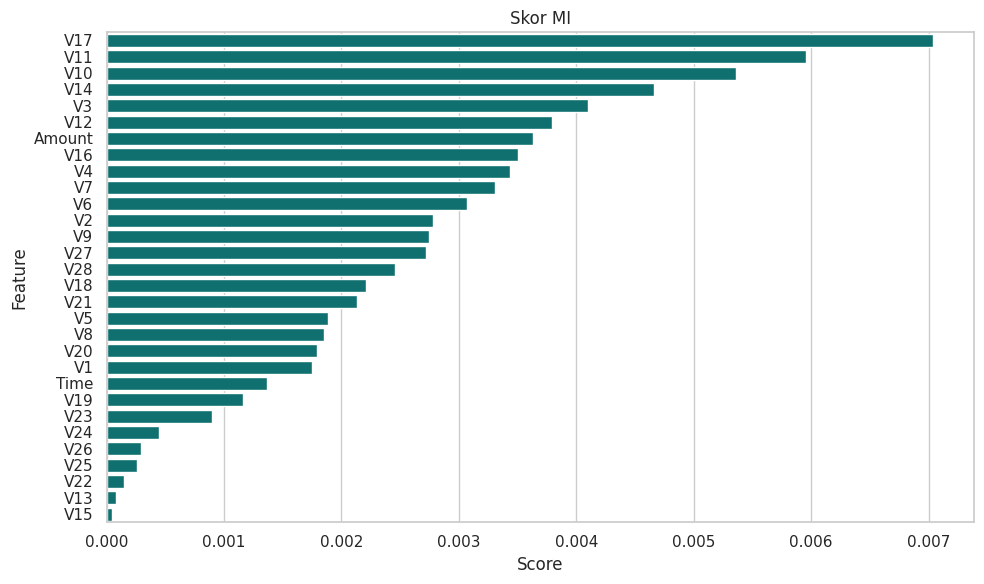


- F-value (ANOVA)


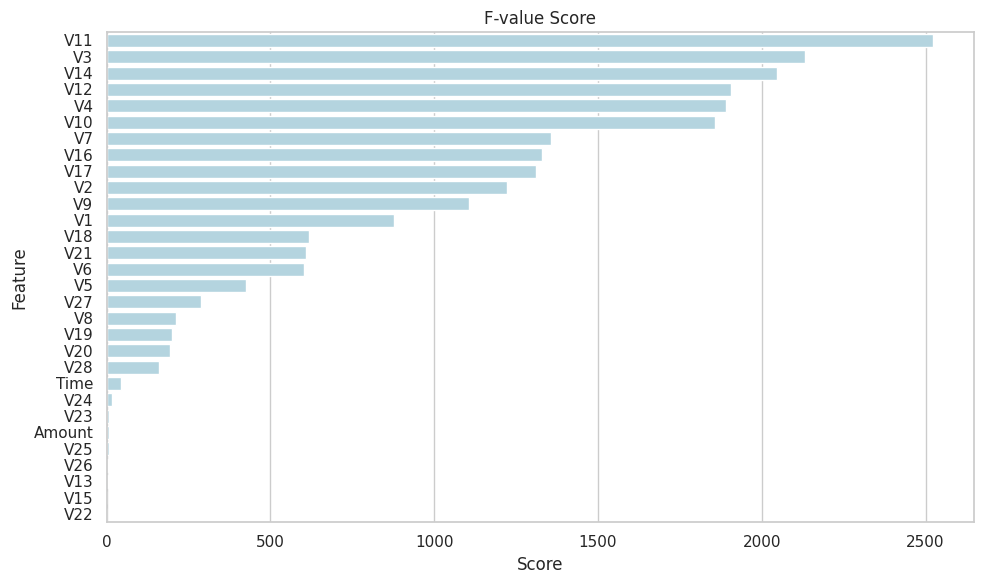


Total fitur akhir: 30
Fitur terpilih: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

=== PROSES FEATURE ENGINEERING ===
Train size: (226980, 30), Test size: (56746, 30)

>> Transformasi yang diterapkan:
- Numerik: Imputer (median) + StandardScaler
- Kategorikal: Imputer (most frequent) + OneHotEncoder

>> Hasil Transformasi:
Train transformed shape: (226980, 30)
Test transformed shape: (56746, 30)


In [ ]:
def engineer_features(X, y, numeric_cols, categorical_cols):
    print("\n=== PROSES FEATURE ENGINEERING ===")

    # Bagi data untuk pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() < 10 else None
    )
    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Pipeline untuk fitur numerik
    num_pipe = Pipeline([
        ('isi_null', SimpleImputer(strategy='median')),
        ('skala', StandardScaler())
    ])

    # Pipeline untuk fitur kategorikal
    cat_pipe = Pipeline([
        ('isi_kosong', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Gabungkan kedua pipeline
    preprocessor = ColumnTransformer([
        ('numerik', num_pipe, numeric_cols),
        ('kategori', cat_pipe, categorical_cols)
    ])

    print("\n>> Transformasi yang diterapkan:")
    print("- Numerik: Imputer (median) + StandardScaler")
    print("- Kategorikal: Imputer (most frequent) + OneHotEncoder")

    # Transformasi
    X_train_proc = preprocessor.fit_transform(X_train)
    X_test_proc = preprocessor.transform(X_test)

    print("\n>> Hasil Transformasi:")
    print(f"Train transformed shape: {X_train_proc.shape}")
    print(f"Test transformed shape: {X_test_proc.shape}")

    if categorical_cols:
        ohe_names = preprocessor.named_transformers_['kategori']['encode'].get_feature_names_out(categorical_cols)
        print(f"\nTotal fitur setelah OHE: {len(ohe_names)}")
        print(f"Contoh fitur: {list(ohe_names[:5])}")

    return X_train, X_test, y_train, y_test, preprocessor, X_train_proc, X_test_proc



# Jalankan seleksi fitur dan simpan hasilnya ke X_selected, y, numeric_cols, dan categorical_cols
X_selected, y, numeric_cols, categorical_cols = select_features(df_clean, kolom_target)

# Jalankan feature engineering
X_train, X_test, y_train, y_test, preprocessor, X_train_transformed, X_test_transformed = engineer_features(X_selected, y, numeric_cols, categorical_cols)



In [ ]:
4. Model


=== TRAINING & EVALUASI MODEL ===

-- Model: Logistic Regression --
Akurasi: 0.9994
Presisi: 0.9994
Recall: 0.9994
F1 Score: 0.9994


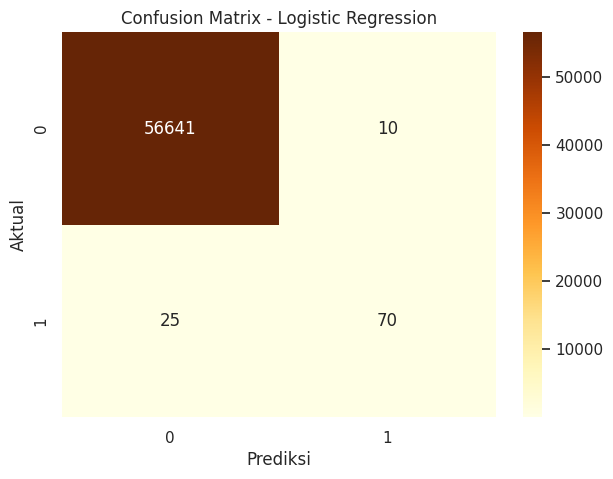


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.74      0.80        95

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



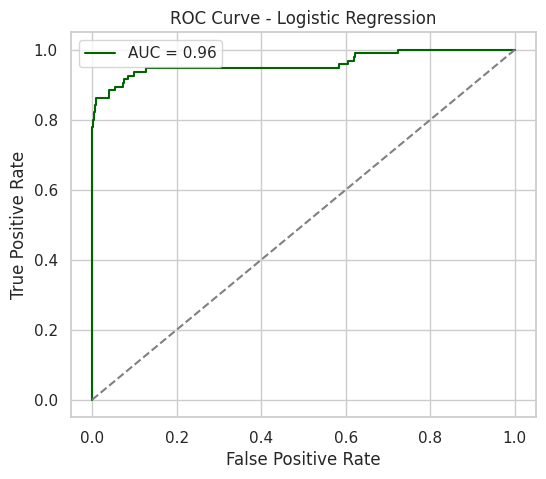


-- Model: Decision Tree --
Akurasi: 0.9992
Presisi: 0.9992
Recall: 0.9992
F1 Score: 0.9992


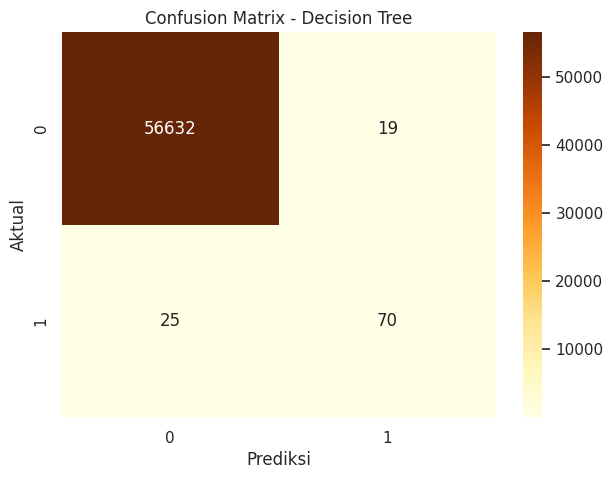


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.74      0.76        95

    accuracy                           1.00     56746
   macro avg       0.89      0.87      0.88     56746
weighted avg       1.00      1.00      1.00     56746



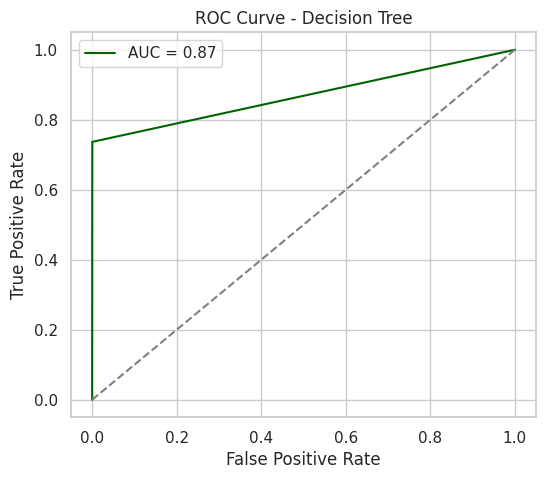


-- Model: KNN --
Akurasi: 0.9995
Presisi: 0.9994
Recall: 0.9995
F1 Score: 0.9994


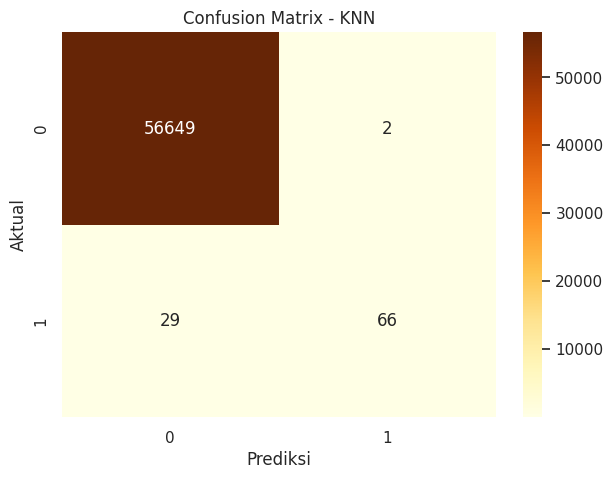


Classification Report - KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.69      0.81        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746



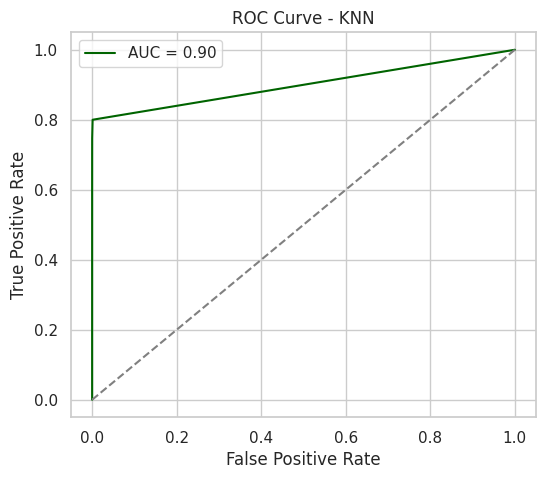


-- Model: Random Forest --
Akurasi: 0.9995
Presisi: 0.9995
Recall: 0.9995
F1 Score: 0.9995


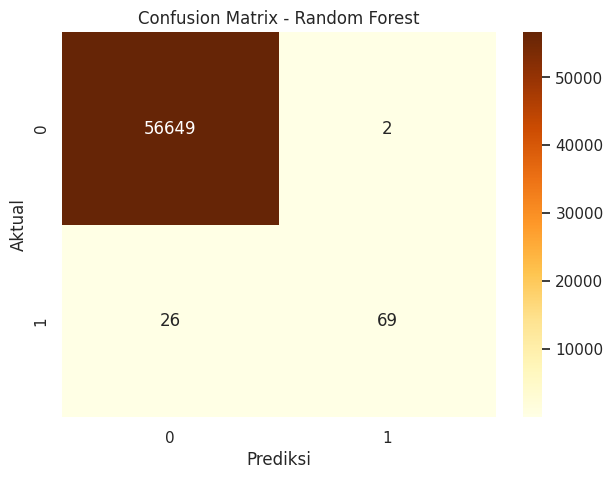


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746



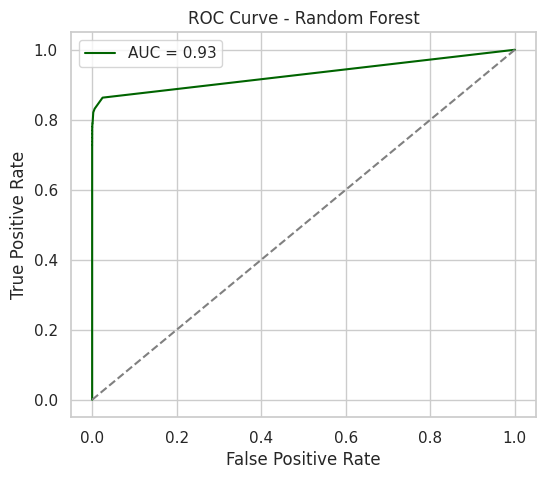


-- Model: Gradient Boosting --


In [ ]:
def buat_dan_evaluasi_model(X_latih, X_uji, y_latih, y_uji, X_latih_trans, X_uji_trans):
    print("\n=== TRAINING & EVALUASI MODEL ===")

    hasil_model = {}

    daftar_model = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    for nama, clf in daftar_model.items():
        print(f"\n-- Model: {nama} --")
        clf.fit(X_latih_trans, y_latih)
        y_pred = clf.predict(X_uji_trans)

        if hasattr(clf, "predict_proba"):
            y_prob = clf.predict_proba(X_uji_trans)
        else:
            y_prob = clf.decision_function(X_uji_trans)
            if y_prob.ndim == 1:
                y_prob = np.column_stack([1 - y_prob, y_prob])
            else:
                y_prob = np.exp(y_prob) / np.sum(np.exp(y_prob), axis=1)[:, None]

        acc = accuracy_score(y_uji, y_pred)
        prec = precision_score(y_uji, y_pred, average='weighted')
        rec = recall_score(y_uji, y_pred, average='weighted')
        f1 = f1_score(y_uji, y_pred, average='weighted')

        print(f"Akurasi: {acc:.4f}")
        print(f"Presisi: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1 Score: {f1:.4f}")

        cm = confusion_matrix(y_uji, y_pred)
        plt.figure(figsize=(7, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
        plt.title(f'Confusion Matrix - {nama}')
        plt.xlabel('Prediksi')
        plt.ylabel('Aktual')
        plt.show()

        print(f"\nClassification Report - {nama}:")
        print(classification_report(y_uji, y_pred))

        if len(np.unique(y_uji)) == 2:
            fpr, tpr, _ = roc_curve(y_uji, y_prob[:, 1])
            auc_score = roc_auc_score(y_uji, y_prob[:, 1])

            plt.figure(figsize=(6, 5))
            plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkgreen')
            plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
            plt.title(f'ROC Curve - {nama}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid(True)
            plt.show()

            hasil_model[nama] = {'model': clf, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'auc': auc_score}
        else:
            hasil_model[nama] = {'model': clf, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

    print("\n=== RANGKUMAN KINERJA MODEL ===")
    rangkuman = pd.DataFrame.from_dict({k: v for k, v in hasil_model.items()}, orient='index')
    rangkuman = rangkuman.sort_values(by='f1', ascending=False).reset_index().rename(columns={'index': 'Model'})
    print(rangkuman)

    plt.figure(figsize=(14, 6))
    metrik = ['accuracy', 'precision', 'recall', 'f1'] + (["auc"] if 'auc' in rangkuman.columns else [])

    for i, m in enumerate(metrik):
        plt.subplot(1, len(metrik), i+1)
        sns.barplot(x='Model', y=m, data=rangkuman)
        plt.title(m.upper())
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return hasil_model, rangkuman

# Panggil fungsi
models, comparison = buat_dan_evaluasi_model(X_train, X_test, y_train, y_test, X_train_transformed, X_test_transformed)

5.Analisis Model

In [ ]:
def engineer_features(X, y, numeric_cols, categorical_cols):
    print("\n=== PROSES FEATURE ENGINEERING ===")

    # Bagi data untuk pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() < 10 else None
    )
    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Pipeline untuk fitur numerik
    num_pipe = Pipeline([
        ('isi_null', SimpleImputer(strategy='median')),
        ('skala', StandardScaler())
    ])

    # Pipeline untuk fitur kategorikal
    cat_pipe = Pipeline([
        ('isi_kosong', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Gabungkan kedua pipeline
    preprocessor = ColumnTransformer([
        ('numerik', num_pipe, numeric_cols),
        ('kategori', cat_pipe, categorical_cols)
    ])

    print("\n>> Transformasi yang diterapkan:")
    print("- Numerik: Imputer (median) + StandardScaler")
    print("- Kategorikal: Imputer (most frequent) + OneHotEncoder")

    # Transformasi
    X_train_proc = preprocessor.fit_transform(X_train)
    X_test_proc = preprocessor.transform(X_test)

    print("\n>> Hasil Transformasi:")
    print(f"Train transformed shape: {X_train_proc.shape}")
    print(f"Test transformed shape: {X_test_proc.shape}")

    if categorical_cols:
        ohe_names = preprocessor.named_transformers_['kategori']['encode'].get_feature_names_out(categorical_cols)
        print(f"\nTotal fitur setelah OHE: {len(ohe_names)}")
        print(f"Contoh fitur: {list(ohe_names[:5])}")

    return X_train, X_test, y_train, y_test, preprocessor, X_train_proc, X_test_proc


# Jalankan feature engineering
X_train, X_test, y_train, y_test, preprocessor, X_train_transformed, X_test_transformed = engineer_features(X_selected, y, numeric_cols, categorical_cols)


def analyze_models(comparison, X_train, y_train, X_test, preprocessor):
    print("\n===== ANALISIS PERBANDINGAN MODEL =====")

    # Identifikasi model terbaik berdasarkan F1 Score
    best_model_name = comparison.iloc[0]['Model']
    best_model = models[best_model_name]['model']

    print(f"\nModel terbaik berdasarkan F1 Score: {best_model_name}")
    print(f"Metrik performa: {models[best_model_name]}")

    # Analisis lebih lanjut pada model terbaik
    print(f"\n===== ANALISIS MENDALAM MODEL TERBAIK: {best_model_name} =====")

    # Feature importance jika model mendukungnya
    if hasattr(best_model, 'feature_importances_'):
        feature_names = []
        if hasattr(preprocessor, 'get_feature_names_out'):
            try:
                feature_names = preprocessor.get_feature_names_out()
            except:
                feature_names = [f'feature_{i}' for i in range(len(best_model.feature_importances_))]
        else:
            feature_names = [f'feature_{i}' for i in range(len(best_model.feature_importances_))]

        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
        plt.title(f'Feature Importance - {best_model_name}')
        plt.tight_layout()
        plt.show()

        print("\nTop 10 fitur paling penting:")
        print(importance_df.head(10))

    if hasattr(best_model, 'best_params_'):
        print("\nHyperparameter Optimal:")
        for param, value in best_model.best_params_.items():
            print(f"  • {param}: {value}")

    print("\nCross-validation untuk model terbaik:")
    cv_scores = cross_val_score(best_model, preprocessor.transform(X_train), y_train, cv=5, scoring='f1_weighted')
    print(f"F1 Scores (5-fold CV): {cv_scores}")
    print(f"Rata-rata F1 Score: {cv_scores.mean():.4f}")
    print(f"Standar Deviasi F1 Score: {cv_scores.std():.4f}")

    class_distribution = y_train.value_counts(normalize=True)
    imbalance_ratio = class_distribution.max() / class_distribution.min()

    print(f"\nDistribusi kelas pada data training: {class_distribution.to_dict()}")
    print(f"Rasio imbalance: {imbalance_ratio:.2f}")

    if imbalance_ratio > 3:
        print("""
Berdasarkan karakteristik dataset dengan distribusi kelas yang tidak seimbang,
metrik evaluasi yang PALING SESUAI adalah F1 Score dan AUC-ROC:

- F1 Score: Menyeimbangkan precision dan recall, yang penting dalam dataset tidak seimbang.
- AUC-ROC: Mengukur kemampuan model untuk membedakan antar kelas pada berbagai threshold.

Accuracy kurang ideal karena model bisa mendapatkan akurasi tinggi hanya dengan memprediksi kelas mayoritas.
""")
    else:
        print("""
Berdasarkan karakteristik dataset dengan distribusi kelas yang relatif seimbang,
semua metrik evaluasi dapat digunakan, namun:

- Accuracy: Memberikan gambaran umum yang baik tentang performa model.
- F1 Score: Masih merupakan metrik yang baik untuk menyeimbangkan precision dan recall.

Pilihan metrik juga bergantung pada konteks bisnis dan konsekuensi dari false positives vs false negatives.
""")

    print("\n===== RINGKASAN AKHIR =====")
    print(f"""
Berdasarkan evaluasi menyeluruh, {best_model_name} merupakan model terbaik untuk kasus klasifikasi ini dengan:
- F1 Score: {models[best_model_name]['f1']:.4f}
- Accuracy: {models[best_model_name]['accuracy']:.4f}
- Precision: {models[best_model_name]['precision']:.4f}
- Recall: {models[best_model_name]['recall']:.4f}
""")

    if 'auc' in models[best_model_name]:
        print(f"- AUC: {models[best_model_name]['auc']:.4f}")

    return best_model_name

# Jalankan analisis model
best_model_name = analyze_models(comparison, X_train, y_train, X_test, preprocessor)



## **Penjelasan Matematis Metrik Evaluasi dan Model Klasifikasi**

### **1. Metrik Evaluasi**

#### **a. Akurasi (Accuracy)**
$$
\text{Akurasi} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
- **TP**: True Positive, **TN**: True Negative  
- **FP**: False Positive, **FN**: False Negative  
- **Interpretasi**: Proporsi prediksi benar secara keseluruhan.  
- **Kelemahan**: Tidak efektif untuk data tidak seimbang (_imbalanced class_).

#### **b. Presisi (Precision)**
$$
\text{Presisi} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
- **Interpretasi**: Kemampuan model menghindari prediksi _false positive_.  
- **Prioritas**: Penting jika biaya **FP** tinggi (e.g., diagnosis penyakit).

#### **c. Recall (Sensitivity)**
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
- **Interpretasi**: Kemampuan model mendeteksi semua _positive case_.  
- **Prioritas**: Penting jika biaya **FN** tinggi (e.g., deteksi fraud).

#### **d. F1-Score**
$$
F1 = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}
$$
- **Interpretasi**: Rata-rata harmonik presisi dan recall.  
- **Kegunaan**: Optimal untuk data tidak seimbang.

#### **e. AUC-ROC**
- **ROC Curve**: Kurva _True Positive Rate_ (TPR) vs _False Positive Rate_ (FPR) dengan variasi threshold klasifikasi.  
- **AUC**: Area di bawah kurva ROC.  
$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$
- **Interpretasi**: AUC = 1 (sempurna), AUC = 0.5 (random guess).  
- **Kegunaan**: Mengevaluasi performa model secara holistik pada semua threshold.

---

### **2. Model Klasifikasi (Formulasi Matematis)**

#### **a. Logistic Regression**
$$
P(y=1 | \mathbf{x}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}}
$$
- **Optimisasi**: Minimalkan _log-loss_ via _Maximum Likelihood Estimation_ (MLE):  
$$
\mathcal{L}(\beta) = -\sum_{i=1}^n \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]
$$

#### **b. Decision Tree**
- **Kriteria Split** (Entropi):  
$$
\text{Entropi}(S) = -\sum_{c \in C} p_c \log_2 p_c
$$
- **Kriteria Split** (Gini Impurity):  
$$
\text{Gini}(S) = 1 - \sum_{c \in C} p_c^2
$$
- **Interpretasi**: Memilih split yang memaksimalkan reduksi ketidakmurnian.

#### **c. K-Nearest Neighbors (KNN)**
$$
\hat{y}(x) = \text{mode}\left( \{ y_i | x_i \in \mathcal{N}_k(x) \} \right)
$$
- $\mathcal{N}_k(x)$: Himpunan $k$ tetangga terdekat dari $x$.  
- **Distance Metric**: Biasanya Euclidean:  
$$
d(x, x') = \sqrt{\sum_{i=1}^p (x_i - x'_i)^2}
$$

#### **d. Random Forest (Bagging)**
- **Ensemble** dari \(B\) decision tree.  
- **Prediksi Final**:  
$$
\hat{y}_{\text{RF}} = \text{mode}\left( \{ \hat{y}_1(x), \hat{y}_2(x), ..., \hat{y}_B(x) \} \right)
$$
- **Diversifikasi**: Setiap tree dilatih pada _bootstrap sample_ dan subset fitur.

#### **e. Gradient Boosting**
- **Model Aditif**:  
$$
F_m(x) = F_{m-1}(x) + \gamma h_m(x)
$$
- **Loss Function** (e.g., log-loss):  
$$
\mathcal{L}(y, F(x)) = \sum_{i=1}^n \left[ -y_i \log(p_i) - (1-y_i) \log(1-p_i) \right]
$$
- **Optimisasi**: $h_m(x)$ dilatih untuk mengoreksi residual $y - F_{m-1}(x)$.

#### **f. Support Vector Machine (SVM)**
- **Optimisasi** (Hyperplane Pemisah):  
$$
\begin{align*}
\min_{\mathbf{w}, b} & \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i \\
\text{s.t.} & \quad y_i(\mathbf{w}^T \phi(\mathbf{x}_i) + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\end{align*}
$$
- **Kernel Trick**: $\phi(\mathbf{x})$ memetakan data ke ruang dimensi tinggi (e.g., RBF kernel: $\phi(\mathbf{x}, \mathbf{x}') = e^{-\gamma \|\mathbf{x} - \mathbf{x}'\|^2}$.


